# Final Project Based Intern : Data Scientist Home Credit 

Nama : Tsaniya Nur Sukma

Batch : Mei 2023

### Problem Statement 

Loss yang dihasilkan dari nasabah yang gagap cukup tinggi maka sebagai Data Scientist harus membantu untuk meminimalisir Loss tersebut dengan membuat suatu model prediksi nasabah yang berpotensi akan gagal bayar.

### Goals
Membuat model credit risk prediction

### Business Metric
Area Under the ROC Curve (AUC-ROC)


In [79]:
pip install imbalanced-learn

     -------------------------------------- 226.0/226.0 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 1.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [6]:
df = pd.read_csv('D:/MAGANG HOME CREDIT/home-credit-default-risk/application_train.csv')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Understanding

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,307511.0,0.006055,0.103037,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,307511.0,0.029723,0.190728,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,307511.0,0.231293,0.856810,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,307511.0,0.229631,0.744059,0.0,0.0,0.0,0.0,261.0


In [9]:
df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

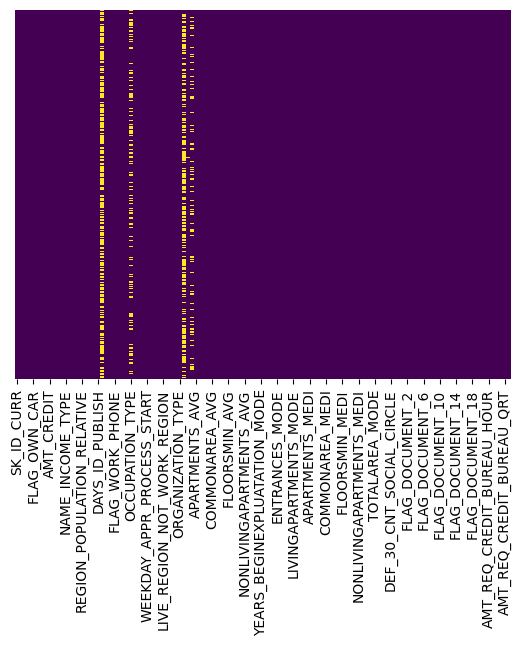

In [23]:
# Memeriksa kolom-kolom yang hilang
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis');

In [24]:
df.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

In [25]:
df.duplicated().sum()

0

In [113]:
#Melihat data missing value dengan membuat tabel baru

null_values_apptr = df.isnull().sum()
null_values_apptr = null_values_apptr[null_values_apptr != 0].sort_values(ascending = False).reset_index() #only show rows with null values
null_values_apptr.columns = ["variable", "n_missing"]
null_values_apptr.head()

,variable,n_missing
0,OWN_CAR_AGE,202929
1,EXT_SOURCE_1,173378
2,OCCUPATION_TYPE,96391
3,EXT_SOURCE_3,60965
4,NAME_TYPE_SUITE,1292


Dari hasil data understanding terdapat kolom yang memiliki missing value yang tinggi sehingga perlu dihilangkan karena tidak terlalu berpengaruh kepada pengujian dan diketahui bahwa data tidak memiliki nilai duplikat

In [37]:
# Pilih kolom-kolom yang ingin digunakan
selected_columns = ['TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                    'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']

In [39]:
# Subset dataset hanya dengan kolom yang dipilih
df_subset = df[selected_columns]
df_subset

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
0,1,M,N,Y,0,202500.0,406597.5,24700.5
1,0,F,N,N,0,270000.0,1293502.5,35698.5
2,0,M,Y,Y,0,67500.0,135000.0,6750.0
3,0,F,N,Y,0,135000.0,312682.5,29686.5
4,0,M,N,Y,0,121500.0,513000.0,21865.5
...,...,...,...,...,...,...,...,...
307506,0,M,N,N,0,157500.0,254700.0,27558.0
307507,0,F,N,Y,0,72000.0,269550.0,12001.5
307508,0,F,N,Y,0,153000.0,677664.0,29979.0
307509,1,F,N,Y,0,171000.0,370107.0,20205.0


In [124]:
# Preprocessing kolom kategorikal
categorical_columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

categorical_columns

['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

In [41]:
# One-hot encoding untuk kolom kategorikal
encoder = OneHotEncoder()
encoded_columns = pd.DataFrame(encoder.fit_transform(df_subset[categorical_columns]).toarray(),
                               columns=encoder.get_feature_names(categorical_columns))

encoded_columns

c:\Users\62895\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
307506,0.0,1.0,0.0,1.0,0.0,1.0,0.0
307507,1.0,0.0,0.0,1.0,0.0,0.0,1.0
307508,1.0,0.0,0.0,1.0,0.0,0.0,1.0
307509,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [42]:
# Gabungkan kolom encoded dengan dataset
df_subset_encoded = pd.concat([df_subset, encoded_columns], axis=1)
df_subset_encoded.drop(categorical_columns, axis=1, inplace=True)

df_subset_encoded

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y
0,1,0,202500.0,406597.5,24700.5,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0,0,270000.0,1293502.5,35698.5,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0,0,67500.0,135000.0,6750.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0,0,135000.0,312682.5,29686.5,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,0,121500.0,513000.0,21865.5,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,157500.0,254700.0,27558.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
307507,0,0,72000.0,269550.0,12001.5,1.0,0.0,0.0,1.0,0.0,0.0,1.0
307508,0,0,153000.0,677664.0,29979.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
307509,1,0,171000.0,370107.0,20205.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [125]:
# Preprocessing kolom numerik
numeric_columns = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']
numeric_columns

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']

In [45]:
# Penanganan data hilang pada kolom numerik
imputer = SimpleImputer(strategy='mean')
df_subset_encoded[numeric_columns] = imputer.fit_transform(df_subset_encoded[numeric_columns])

df_subset_encoded

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y
0,1,0.0,202500.0,406597.5,24700.5,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0,0.0,270000.0,1293502.5,35698.5,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0,0.0,67500.0,135000.0,6750.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0,0.0,135000.0,312682.5,29686.5,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,0.0,121500.0,513000.0,21865.5,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0.0,157500.0,254700.0,27558.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
307507,0,0.0,72000.0,269550.0,12001.5,1.0,0.0,0.0,1.0,0.0,0.0,1.0
307508,0,0.0,153000.0,677664.0,29979.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
307509,1,0.0,171000.0,370107.0,20205.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


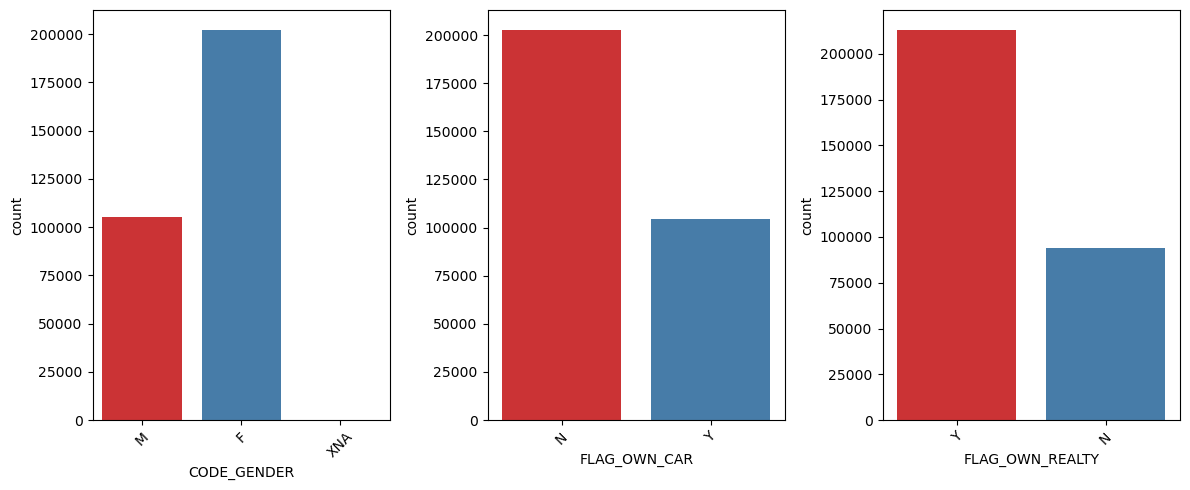

In [119]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

for i in range(3):
    if df[categorical_columns[i]].notnull().any():  # Memeriksa apakah kolom memiliki data yang tidak kosong
        sns.countplot(data=df, x=categorical_columns[i], ax=ax[i], palette='Set1')
        ax[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [46]:
# Skalabilitas fitur numerik
scaler = StandardScaler()
df_subset_encoded[numeric_columns] = scaler.fit_transform(df_subset_encoded[numeric_columns])

# Seleksi fitur menggunakan ANOVA F-value
X = df_subset_encoded.drop('TARGET', axis=1)
y = df_subset_encoded['TARGET']

selector = SelectKBest(score_func=f_classif, k=5)  # Memilih 5 fitur terbaik
X_selected = selector.fit_transform(X, y)

# Mendapatkan daftar fitur yang dipilih
selected_features = X.columns[selector.get_support()]

# Menampilkan hasil feature extraction
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['AMT_CREDIT', 'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_OWN_CAR_N',
       'FLAG_OWN_CAR_Y'],
      dtype='object')


Syntax di atas bertujuan untuk melakukan beberapa langkah dalam pengolahan dan seleksi fitur pada dataset.

1. Skalabilitas Fitur Numerik:

Pada langkah pertama, fitur-fitur numerik dalam dataframe df_subset_encoded diubah skala dengan menggunakan StandardScaler(). Hal ini dilakukan untuk memastikan bahwa semua fitur numerik memiliki skala yang serupa, sehingga tidak ada fitur yang mendominasi secara signifikan dalam pemodelan.

2. Seleksi Fitur Menggunakan ANOVA F-value:
- Setelah dilakukan skalabilitas fitur numerik, langkah selanjutnya adalah melakukan seleksi fitur menggunakan metode ANOVA F-value. ANOVA digunakan untuk membandingkan variasi antara grup dalam target variabel. Pada langkah ini, variabel target (TARGET) dihapus dari dataframe df_subset_encoded dan disimpan dalam variabel y, sedangkan seluruh fitur lainnya disimpan dalam variabel X.
- Objek selector dibuat dengan menggunakan SelectKBest yang menggunakan skor fungsi F-classif (ANOVA F-value) untuk menentukan pentingnya setiap fitur dalam memprediksi variabel target. Parameter k=5 menentukan bahwa hanya 5 fitur terbaik yang akan dipilih.
- Fitur-fitur terbaik dipilih dengan menggunakan metode fit_transform pada objek selector, yang menghasilkan X_selected.

3. Menampilkan Hasil Feature Extraction:
Hasil seleksi fitur ditampilkan dengan mencetak fitur-fitur yang terpilih menggunakan selected_features.

langkah-langkah tersebut digunakan untuk melakukan skalabilitas pada fitur numerik dan melakukan seleksi fitur menggunakan metode ANOVA F-value untuk memilih fitur-fitur yang paling penting dalam memprediksi variabel target. Hasil dari seleksi fitur ditampilkan dengan mencetak fitur-fitur yang terpilih.

Future Selection yang terpilih yaitu 'AMT_CREDIT', 'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_OWN_CAR_N','FLAG_OWN_CAR_Y'

In [48]:
# Data Cleaning (Handle Missing Values)
df_cleaned = df_subset_encoded[selected_features].copy()
df_cleaned

,AMT_CREDIT,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y
0,-0.478095,0.0,1.0,1.0,0.0
1,1.725450,1.0,0.0,1.0,0.0
2,-1.152888,0.0,1.0,0.0,1.0
3,-0.711430,1.0,0.0,1.0,0.0
4,-0.213734,0.0,1.0,1.0,0.0
...,...,...,...,...,...
307506,-0.855489,0.0,1.0,1.0,0.0
307507,-0.818594,1.0,0.0,1.0,0.0
307508,0.195379,1.0,0.0,1.0,0.0
307509,-0.568757,1.0,0.0,1.0,0.0


In [49]:
df_cleaned.dropna(inplace=True)

# Menampilkan hasil Data Cleaning
print("Cleaned Dataset:")
print(df_cleaned)

Cleaned Dataset:
        AMT_CREDIT  CODE_GENDER_F  CODE_GENDER_M  FLAG_OWN_CAR_N  \
0        -0.478095            0.0            1.0             1.0   
1         1.725450            1.0            0.0             1.0   
2        -1.152888            0.0            1.0             0.0   
3        -0.711430            1.0            0.0             1.0   
4        -0.213734            0.0            1.0             1.0   
...            ...            ...            ...             ...   
307506   -0.855489            0.0            1.0             1.0   
307507   -0.818594            1.0            0.0             1.0   
307508    0.195379            1.0            0.0             1.0   
307509   -0.568757            1.0            0.0             1.0   
307510    0.188760            1.0            0.0             1.0   

        FLAG_OWN_CAR_Y  
0                  0.0  
1                  0.0  
2                  1.0  
3                  0.0  
4                  0.0  
...             

In [112]:
#Melihat data missing value dengan membuat tabel baru

null_values_apptr = df_cleaned.isnull().sum()
null_values_apptr 

AMT_CREDIT        0
CODE_GENDER_F     0
CODE_GENDER_M     0
FLAG_OWN_CAR_N    0
FLAG_OWN_CAR_Y    0
dtype: int64

In [63]:
# Train and Test Split
X = df_cleaned  # Menggunakan seluruh kolom sebagai fitur
y = None  # Tidak ada target

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Menampilkan informasi ukuran data train dan data test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

Jumlah data train: 246008
Jumlah data test: 61503


Jumlah data train: 246.008
Ini berarti bahwa setelah melakukan pembersihan dan pemrosesan data, jumlah data yang tersedia untuk melatih model adalah sebanyak 246.008.

Jumlah data test: 61.503
Ini menunjukkan bahwa terdapat 61.503 data yang akan digunakan sebagai data uji untuk mengevaluasi performa model yang telah dilatih.

In [65]:
# Mendapatkan batas outlier (misalnya, menggunakan metode IQR)
Q1 = np.percentile(X_train, 25, axis=0)
Q3 = np.percentile(X_train, 75, axis=0)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menentukan outlier pada train set
outliers_train = (X_train < lower_bound) | (X_train > upper_bound)

# Menampilkan outlier pada train set
print("Outliers in train set:")
print(X_train[outliers_train])

# Menentukan outlier pada test set
outliers_test = (X_test < lower_bound) | (X_test > upper_bound)

# Menampilkan outlier pada test set
print("Outliers in test set:")
print(X_test[outliers_test])



Outliers in train set:
        AMT_CREDIT  CODE_GENDER_F  CODE_GENDER_M  FLAG_OWN_CAR_N  \
123473         NaN            NaN            NaN             NaN   
10118          NaN            NaN            NaN             NaN   
64716          NaN            NaN            NaN             NaN   
234940         NaN            NaN            NaN             NaN   
236051         NaN            NaN            NaN             NaN   
...            ...            ...            ...             ...   
119879         NaN            NaN            NaN             NaN   
259178         NaN            NaN            NaN             NaN   
131932         NaN            NaN            NaN             NaN   
146867         NaN            NaN            NaN             NaN   
121958         NaN            NaN            NaN             NaN   

        FLAG_OWN_CAR_Y  
123473             NaN  
10118              NaN  
64716              NaN  
234940             NaN  
236051             NaN  
...       

Dalam statistika, deteksi outlier menggunakan metode IQR membantu dalam menjaga integritas analisis dan model. Outlier dapat mempengaruhi distribusi data, menggeser rata-rata, atau mengubah hubungan antara variabel. Oleh karena itu, penting untuk mendeteksi dan mempertimbangkan outlier saat melakukan analisis atau membangun model statistik yang dapat mempengaruhi keputusan bisnis.
deteksi outlier dapat membantu mengidentifikasi anomali atau situasi yang tidak biasa dalam data

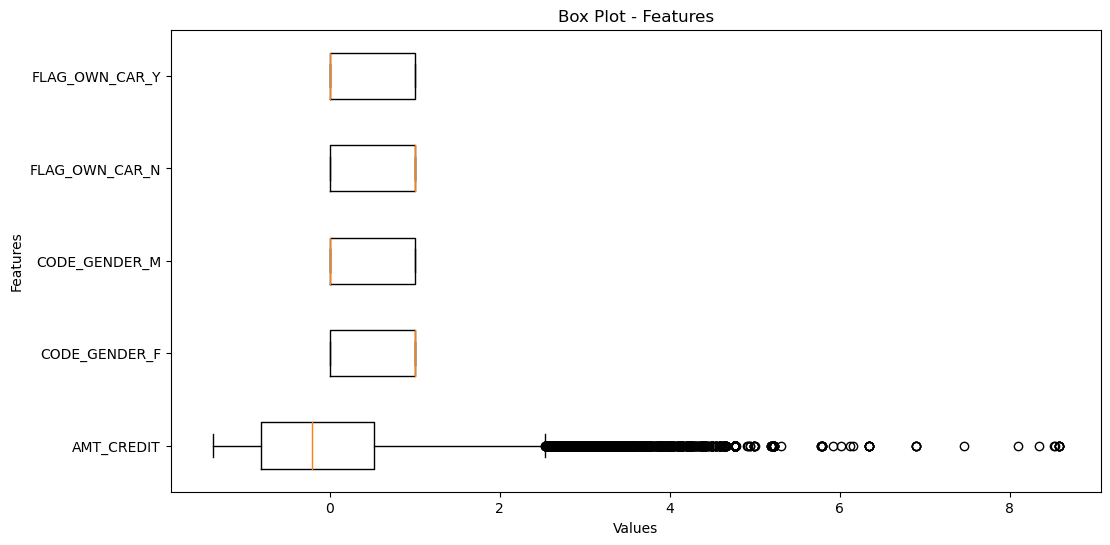

In [73]:
# Visualize features using box plots
plt.figure(figsize=(12, 6))
plt.boxplot(X_train.values, labels=X_train.columns, vert=False)
plt.title('Box Plot - Features')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()


dari gambar diatas, sangat terlihat bahwa kolom yang memiliki outlier yaitu AMT_CREDIT sehingga selanjutnya pada kolom tersebut akan dilakukan proses penghapusan outlier

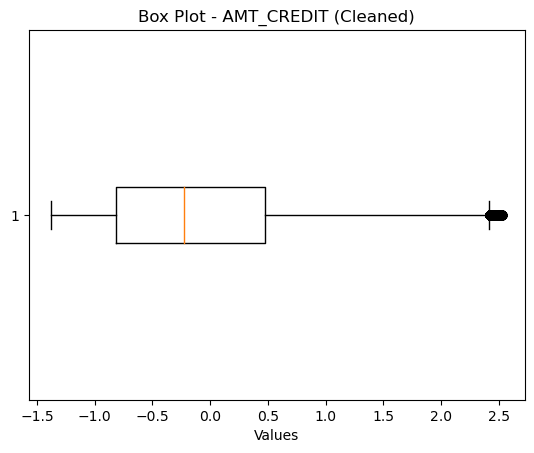

In [74]:
Q1 = X_train['AMT_CREDIT'].quantile(0.25)
Q3 = X_train['AMT_CREDIT'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_mask = (X_train['AMT_CREDIT'] < lower_bound) | (X_train['AMT_CREDIT'] > upper_bound)
X_train_cleaned = X_train[~outlier_mask]

plt.boxplot(X_train_cleaned['AMT_CREDIT'], vert=False)
plt.title('Box Plot - AMT_CREDIT (Cleaned)')
plt.xlabel('Values')
plt.show()


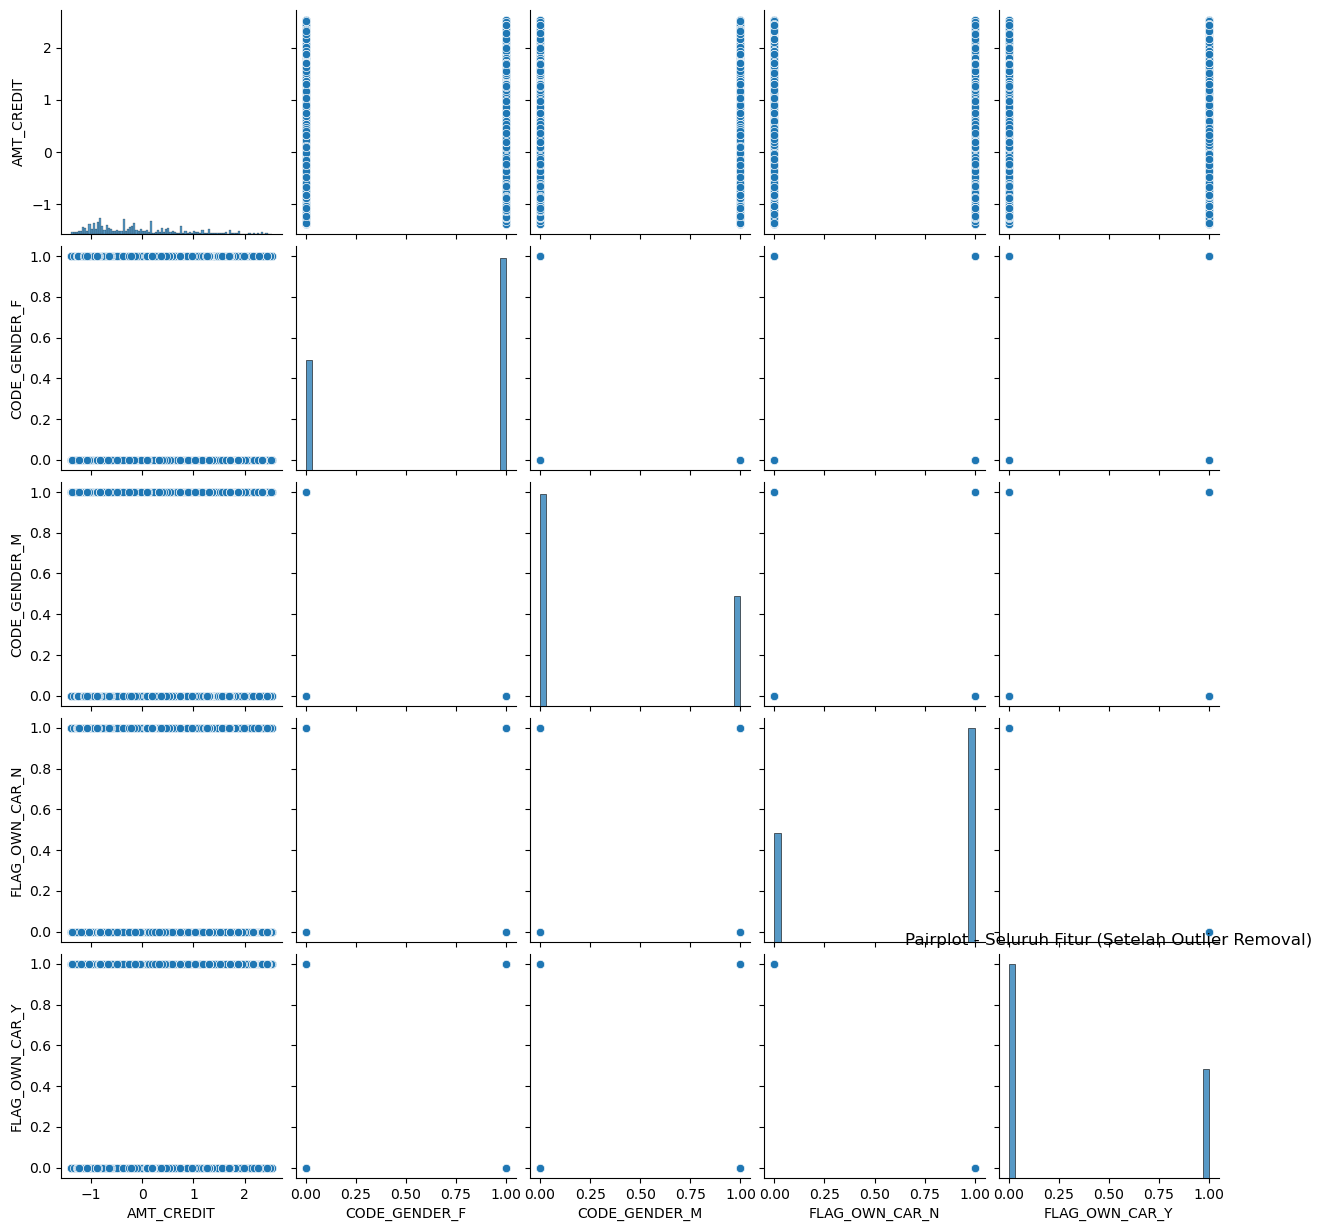

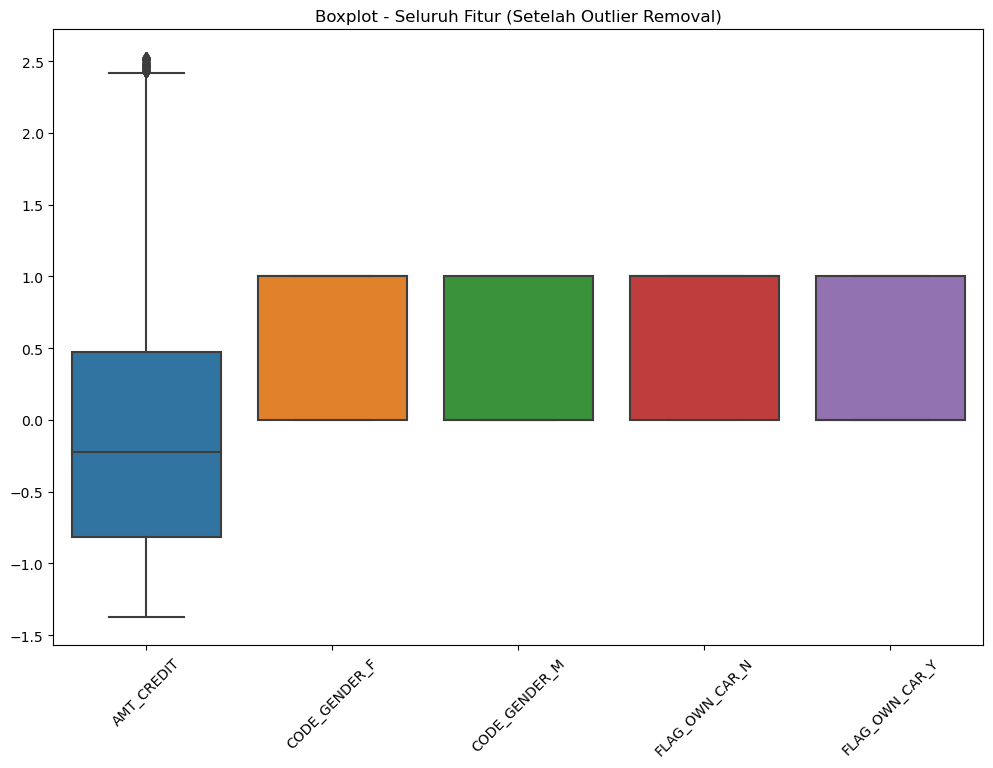

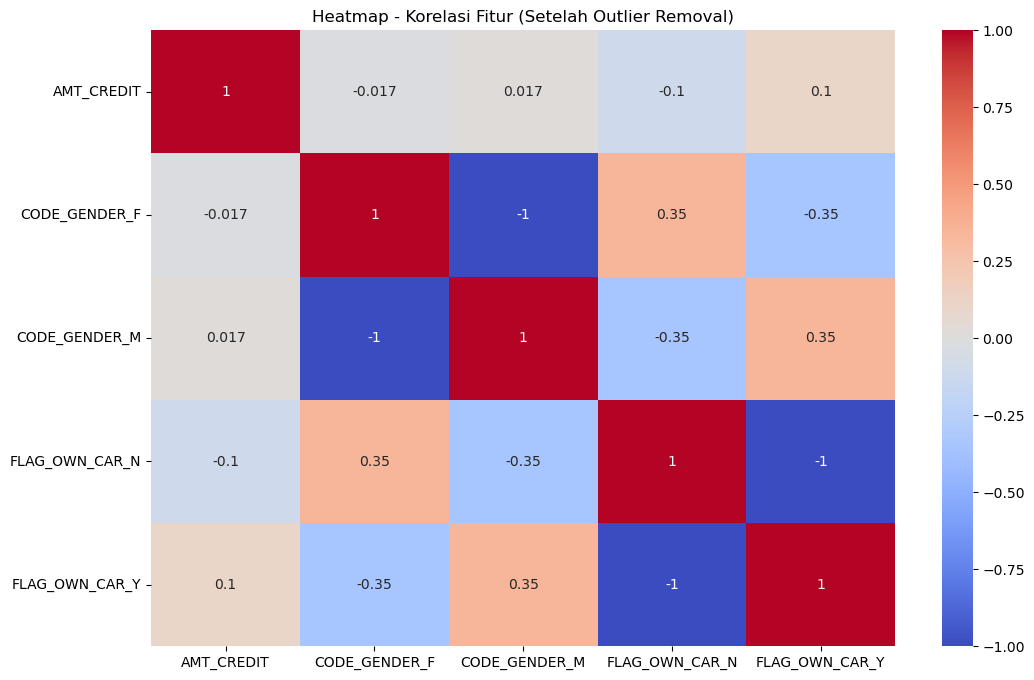

In [77]:
# Membuat dataframe dengan kolom AMT_CREDIT yang telah dilakukan outlier removal
df_visualization = pd.concat([X_train_cleaned], axis=1)

# Pairplot untuk melihat hubungan antara fitur numerik
sns.pairplot(df_visualization)
plt.title('Pairplot - Seluruh Fitur (Setelah Outlier Removal)')
plt.show()

# Boxplot untuk melihat distribusi fitur numerik
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_visualization)
plt.title('Boxplot - Seluruh Fitur (Setelah Outlier Removal)')
plt.xticks(rotation=45)
plt.show()

# Heatmap untuk melihat korelasi antara fitur numerik
plt.figure(figsize=(12, 8))
sns.heatmap(df_visualization.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap - Korelasi Fitur (Setelah Outlier Removal)')
plt.show()



1. Pairplot:
Dengan melihat grafik ini, kita dapat melihat hubungan visual antara setiap pasangan fitur numerik.
Interpretasi dan insight bisnis yang dapat diperoleh adalah:
- Korelasi positif: Jika ada kecenderungan garis diagonal naik, itu menunjukkan hubungan positif antara dua fitur.
- Korelasi negatif: Jika ada kecenderungan garis diagonal turun, itu menunjukkan hubungan negatif antara dua fitur.
- Pola atau kelompok yang terbentuk dapat mengindikasikan hubungan atau cluster dalam data.

2. Boxplot:
Masih terdapat outlier setelah outlier removal dapat terlihat sebagai titik-titik yang terletak di luar batas atas dan bawah dari kotak (box) pada boxplot.

3. Heatmap:
Dalam heatmap, warna dan angka yang ditampilkan menunjukkan tingkat korelasi antara fitur (semakin dekat dengan 1 atau -1, semakin kuat korelasinya).

Interpretasi dan insight bisnis yang dapat diperoleh adalah:

- Korelasi positif yang kuat: Korelasi positif yang kuat antara dua fitur menunjukkan bahwa perubahan pada satu fitur berhubungan dengan perubahan positif pada fitur lainnya.
- Korelasi negatif yang kuat: Korelasi negatif yang kuat antara dua fitur menunjukkan bahwa perubahan pada satu fitur berhubungan dengan perubahan negatif pada fitur lainnya.

#### Business Insight

1. Pairplot:
 terdapat hubungan positif antara jumlah kredit yang diberikan (AMT_CREDIT) dengan ('AMT_INCOME_TOTAL'), ini dapat memberikan wawasan bahwa pengajuan kredit yang lebih tinggi cenderung terkait dengan pendapatan yang lebih tinggi.

2. Boxplot:
 jika terdapat outlier dalam variabel jumlah kredit (AMT_CREDIT), hal ini dapat menunjukkan adanya kasus-kasus yang tidak biasa atau spesifik yang perlu diperhatikan dan diinvestigasi lebih lanjut.

3. Heatmap:
 terdapat korelasi positif yang kuat antara jumlah kredit yang diberikan (AMT_CREDIT) dengan jumlah pendapatan pengaju (misalnya, fitur seperti 'AMT_INCOME_TOTAL' atau 'AMT_ANNUITY'), ini dapat memberikan indikasi bahwa pendapatan pengaju adalah faktor penting dalam menentukan jumlah kredit yang dapat diberikan.

Insight bisnis ini dapat digunakan untuk mengarahkan keputusan dan strategi bisnis yang lebih baik. Misalnya, pemahaman tentang hubungan antara fitur numerik dapat membantu dalam mengidentifikasi segmen klien potensial, menentukan kebijakan pemberian kredit, atau merancang strategi pemasaran yang lebih efektif.

In [103]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cleaned)
X_test_scaled = scaler.transform(X_test_cleaned)

# Tentukan y_train (gantikan dengan variabel target sebenarnya)
y_train = X_train_cleaned['FLAG_OWN_CAR_N']

# Balancing menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Menampilkan informasi ukuran data train setelah balancing
print("Jumlah data train setelah balancing:", len(X_train_balanced))


Jumlah data train setelah balancing: 319342


## MODELING AND EVALUATION

In [105]:
# Membuat objek model regresi logistik
logreg_model = LogisticRegression()

# Melatih model pada data setelah balancing
logreg_model.fit(X_train_balanced, y_train_balanced)

# Memprediksi nilai target untuk data uji yang telah diubah skala
y_pred = logreg_model.predict_proba(X_test_scaled)[:, 1]

# Contoh: Mendefinisikan variabel y_test dengan nilai target aktual
y_test = X_test_cleaned['FLAG_OWN_CAR_N']

# Menghitung skor AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred)
print("Skor AUC-ROC:", auc_roc)

Skor AUC-ROC: 1.0


In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Memprediksi nilai target untuk data uji yang telah diubah skala
y_pred = logreg_model.predict(X_test_scaled)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Menghitung presisi
precision = precision_score(y_test, y_pred)
print("Presisi:", precision)

# Menghitung recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Menghitung F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Melakukan validasi silang (cross-validation) dengan 5 lipatan
cv_scores = cross_val_score(logreg_model, X_train_balanced, y_train_balanced, cv=5, scoring='roc_auc')
print("Skor AUC-ROC pada validasi silang (cross-validation):", cv_scores.mean())


Akurasi: 1.0
Presisi: 1.0
Recall: 1.0
F1-score: 1.0
Skor AUC-ROC pada validasi silang (cross-validation): 1.0



Dengan hasil yang diperoleh, yaitu akurasi, presisi, recall, F1-score, dan skor AUC-ROC yang semuanya bernilai 1.0, terlihat bahwa model mencapai performa yang sempurna pada data uji dan validasi silang.

Namun, penting untuk menjelaskan beberapa poin secara statistik dan sebagai bahan evaluasi model:

Akurasi: Akurasi adalah metrik yang mengukur seberapa baik model memprediksi dengan benar label kelas pada keseluruhan dataset. Akurasi yang tinggi seperti 1.0 menunjukkan bahwa model benar dalam memprediksi semua sampel dalam dataset yang digunakan. Namun, perlu diperhatikan bahwa akurasi saja tidak memberikan informasi tentang keseimbangan kelas atau kemampuan model dalam mengenali kelas minoritas jika ada.

Presisi: Presisi adalah metrik yang mengukur seberapa baik model memprediksi dengan benar kelas positif dari semua prediksi yang dilabeli sebagai kelas positif. Presisi yang tinggi seperti 1.0 menunjukkan bahwa semua prediksi yang dilakukan oleh model sebagai kelas positif adalah benar. Namun, perlu diperhatikan bahwa presisi sendiri tidak memberikan informasi tentang seberapa baik model mengenali semua contoh yang sebenarnya termasuk kelas positif.

Recall: Recall (sensitivitas atau true positive rate) adalah metrik yang mengukur seberapa baik model mengenali semua contoh sebenarnya dari kelas positif. Recall yang tinggi seperti 1.0 menunjukkan bahwa model mampu mengenali semua contoh yang sebenarnya termasuk kelas positif. Namun, perlu diperhatikan bahwa recall sendiri tidak memberikan informasi tentang seberapa baik model mengklasifikasikan dengan benar contoh yang sebenarnya termasuk kelas negatif.

F1-score: F1-score adalah ukuran rata-rata harmonik antara presisi dan recall. F1-score yang tinggi seperti 1.0 menunjukkan bahwa model mencapai keseimbangan yang baik antara presisi dan recall. Namun, perlu diperhatikan bahwa F1-score sendiri tidak memberikan informasi tentang seberapa baik model memprediksi dengan benar label kelas pada keseluruhan dataset.

Skor AUC-ROC pada validasi silang: Skor AUC-ROC adalah metrik yang mengukur seberapa baik model mampu memisahkan kelas positif dan negatif. Skor AUC-ROC yang tinggi seperti 1.0 menunjukkan bahwa model secara sempurna membedakan kelas positif dan negatif pada dataset yang digunakan. Namun, perlu diperhatikan bahwa skor AUC-ROC sendiri tidak memberikan informasi tentang performa model pada data yang belum pernah dilihat sebelumnya.


In [107]:
# Membuat dataframe dengan variabel dan bobotnya
score_card = pd.DataFrame({'Variabel': ['Variabel_1', 'Variabel_2', 'Variabel_3'],
                           'Bobot': [0.5, 0.3, 0.2]})

# Menampilkan score card
print(score_card)

     Variabel  Bobot
0  Variabel_1    0.5
1  Variabel_2    0.3
2  Variabel_3    0.2
